In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect('bollywood_movies.sqlite')

In [3]:
cursor = conn.cursor()

In [4]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)

Tables in the database: [('Movies',)]


In [6]:
import pandas as pd

df = pd.read_sql_query("SELECT * FROM Movies", conn)
print(df.head())

   index MovieID                         Title            Director  \
0      0  MOV001                        Lagaan  Ashutosh Gowariker   
1      1  MOV002   Kabhi Khushi Kabhie Gham...         Karan Johar   
2      2  MOV003  M.S. Dhoni: The Untold Story       Neeraj Pandey   
3      3  MOV004   Baahubali 2: The Conclusion     S. S. Rajamouli   
4      4  MOV005               Chennai Express        Rohit Shetty   

                       Genre  ReleaseYear  Budget (Crores)  \
0                       None         2001              NaN   
1               Family Drama         2001             50.0   
2  Biographical Sports Drama         2016              NaN   
3        Epic Fantasy Action         2017            250.0   
4              Action Comedy         2013              NaN   

   BoxOffice (Crores)  Rating  Duration (minutes)             LeadActor  \
0               100.0     8.1                 224            Aamir Khan   
1               100.0     7.9                 210       

/tmp/ipykernel_26862/195717910.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Profit'] = df_clean['BoxOffice (Crores)'] - df_clean['Budget (Crores)']
/tmp/ipykernel_26862/195717910.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ROI'] = df_clean['Profit'] / df_clean['Budget (Crores)']


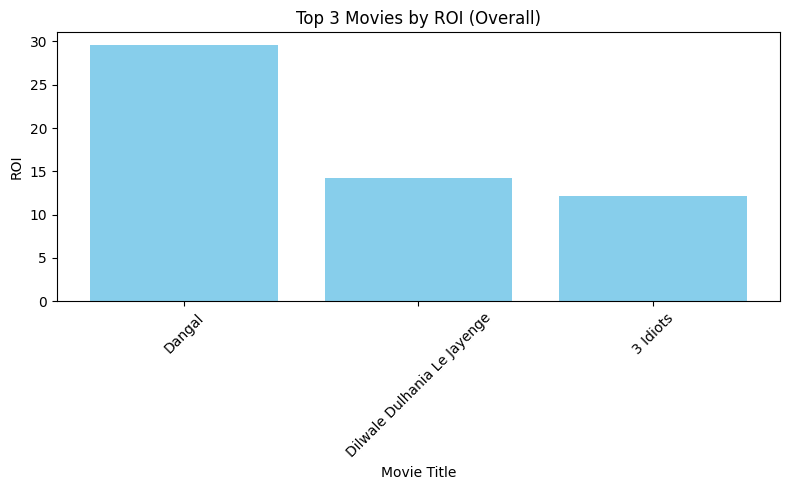

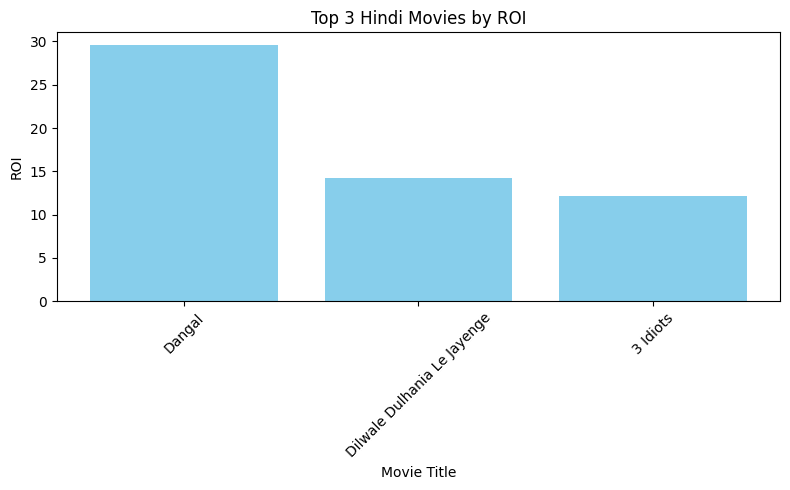

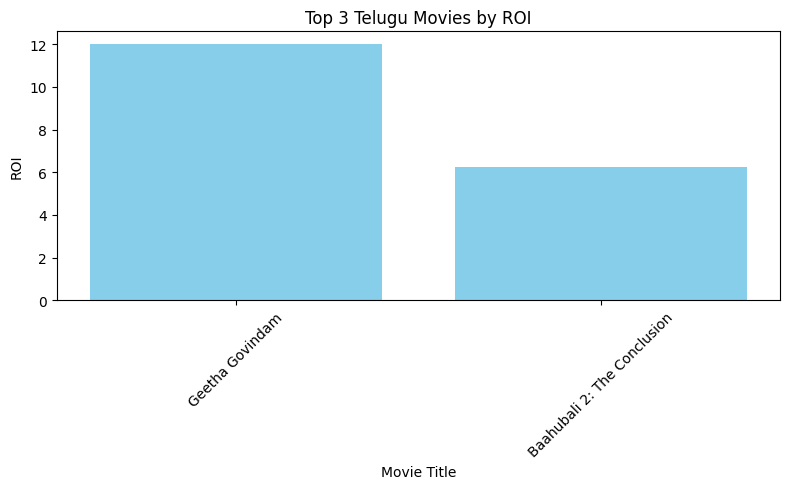

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop rows where Budget or BoxOffice is missing
df_clean = df.dropna(subset=['Budget (Crores)', 'BoxOffice (Crores)'])

# Step 2: Calculate Profit and ROI
df_clean['Profit'] = df_clean['BoxOffice (Crores)'] - df_clean['Budget (Crores)']
df_clean['ROI'] = df_clean['Profit'] / df_clean['Budget (Crores)']

# Step 3: Top 3 Movies Overall
top_overall = df_clean.sort_values(by='ROI', ascending=False).head(3)

# Step 4: Top 3 Hindi Movies
top_hindi = df_clean[df_clean['Language'] == 'Hindi'].sort_values(by='ROI', ascending=False).head(3)

# Step 5: Top 3 Telugu Movies
top_telugu = df_clean[df_clean['Language'] == 'Telugu'].sort_values(by='ROI', ascending=False).head(3)

# Step 6: Plotting Function
def plot_top_movies(df_subset, title):
    plt.figure(figsize=(8, 5))
    plt.bar(df_subset['Title'], df_subset['ROI'], color='skyblue')
    plt.title(title)
    plt.xlabel('Movie Title')
    plt.ylabel('ROI')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 7: Generate Graphs
plot_top_movies(top_overall, "Top 3 Movies by ROI (Overall)")
plot_top_movies(top_hindi, "Top 3 Hindi Movies by ROI")
plot_top_movies(top_telugu, "Top 3 Telugu Movies by ROI")